INTRODUCTION

This dataset contains **9,537 records** with **11 features** related to cybersecurity intrusion detection. Each record represents a network session with details such as **packet size**, **protocol type**, and **login attempts**. The dataset also includes indicators like **IP reputation score** and **unusual access times** to help identify potential attacks. The target variable, **attack_detected**, marks whether a session was identified as malicious or not.

IMPORT LABARIES AND LOAD DATASET 

In [26]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
#import dataset
df=pd.read_csv(r'C:\Data Science\data_set\cybersecurity_intrusion_data.csv')
print(df)




     session_id  network_packet_size protocol_type  login_attempts  \
0     SID_00001                  599           TCP               4   
1     SID_00002                  472           TCP               3   
2     SID_00003                  629           TCP               3   
3     SID_00004                  804           UDP               4   
4     SID_00005                  453           TCP               5   
...         ...                  ...           ...             ...   
9532  SID_09533                  194          ICMP               3   
9533  SID_09534                  380           TCP               3   
9534  SID_09535                  664           TCP               5   
9535  SID_09536                  406           TCP               4   
9536  SID_09537                  340           TCP               6   

      session_duration encryption_used  ip_reputation_score  failed_logins  \
0           492.983263             DES             0.606818              1   
1  

DATA CLEANING 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [28]:
df.isna().sum()

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.drop(['unusual_time_access'],axis=1)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0
...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,1
9533,SID_09534,380,TCP,3,182.848475,None,0.408485,0,Chrome,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,0


In [31]:
le=LabelEncoder()
df['protocol_type']=le.fit_transform(df['protocol_type'])
df['encryption_used']=le.fit_transform(df['encryption_used'])
df['browser_type']=le.fit_transform(df['browser_type'])

DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

                     network_packet_size  protocol_type  login_attempts  \
network_packet_size             1.000000       0.011951       -0.001890   
protocol_type                   0.011951       1.000000        0.023631   
login_attempts                 -0.001890       0.023631        1.000000   
session_duration                0.021650      -0.003635        0.006392   
encryption_used                 0.014729      -0.018231        0.001626   
ip_reputation_score             0.002320       0.030647       -0.002618   
failed_logins                  -0.011676      -0.005951       -0.013507   
browser_type                    0.019276       0.016380       -0.004986   
attack_detected                -0.006798       0.013890        0.277320   

                     session_duration  encryption_used  ip_reputation_score  \
network_packet_size          0.021650         0.014729             0.002320   
protocol_type               -0.003635        -0.018231             0.030647   
login_attemp

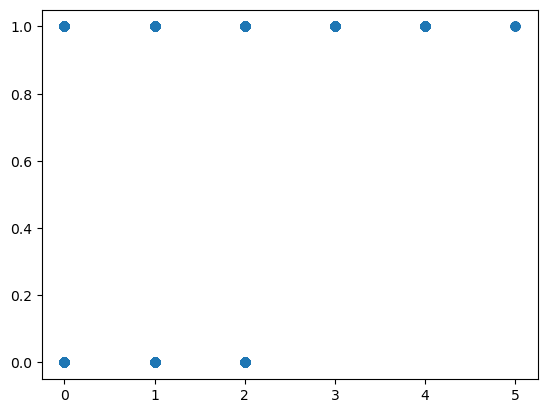

In [32]:

cor=df[['network_packet_size','protocol_type','login_attempts','session_duration','encryption_used','ip_reputation_score','failed_logins','browser_type','attack_detected']].corr()
print(cor)
plt.scatter(df['failed_logins'],df['attack_detected'])
#plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT 

In [33]:
x=df[['network_packet_size','protocol_type','login_attempts','session_duration','encryption_used','ip_reputation_score','failed_logins','browser_type']].values
x=pd.DataFrame(x)
y=df['attack_detected'].values
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

FEATURE SCALING

In [35]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

MODEL BUILDING AND EVALUATE PREDICTIONS 

MODEL OF KNN

In [36]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

      0
9404  1
7612  1
8689  0
8407  0
6926  1
...  ..
7835  0
1600  0
6154  1
3193  1
1288  1

[1908 rows x 1 columns]
[1 1 0 ... 0 1 1]


In [38]:
print("mse value of knn regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in knn regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of knn regression: 0.19129979035639413
accuracy in knn regression: 80.87002096436059


MODEL OF LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',random_state=42)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [40]:
y_predict=model.predict(x_test)
print(y_test)
print(y_predict)

      0
9404  1
7612  1
8689  0
8407  0
6926  1
...  ..
7835  0
1600  0
6154  1
3193  1
1288  1

[1908 rows x 1 columns]
[0 1 0 ... 0 1 1]


In [41]:
print("mse value of logistic regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in logistic regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of logistic regression: 0.259958071278826
accuracy in logistic regression: 74.0041928721174


MODEL OF SVM

In [42]:
from sklearn.svm import SVC
model1=SVC(kernel='linear',random_state=87)
model1.fit(x_train,y_train)

SVC(kernel='linear', random_state=87)

In [43]:
y_predict=model1.predict(x_test)
print(y_test)
print(y_predict)

      0
9404  1
7612  1
8689  0
8407  0
6926  1
...  ..
7835  0
1600  0
6154  1
3193  1
1288  1

[1908 rows x 1 columns]
[0 1 0 ... 0 1 1]


In [44]:
print("mse value of Svm regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in Svm regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of Svm regression: 0.2557651991614256
accuracy in Svm regression: 74.42348008385744


MODEL OF RANDOM FOREST 

In [45]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=20)
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=20)

In [46]:
y_predict=model2.predict(x_test)
print(y_test)
print(y_predict)

      0
9404  1
7612  1
8689  0
8407  0
6926  1
...  ..
7835  0
1600  0
6154  1
3193  1
1288  1

[1908 rows x 1 columns]
[1 1 0 ... 0 1 1]


In [47]:
print("mse value of random forest:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in random forest:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of random forest: 0.11582809224318659
accuracy in random forest: 88.41719077568135


MODEL OF DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',random_state=80)
model3.fit(x_train,y_train)




DecisionTreeClassifier(criterion='entropy', random_state=80)

In [49]:
y_predict=model3.predict(x_test)
print(y_test)
print(y_predict)

      0
9404  1
7612  1
8689  0
8407  0
6926  1
...  ..
7835  0
1600  0
6154  1
3193  1
1288  1

[1908 rows x 1 columns]
[1 1 0 ... 0 1 1]


In [50]:
print("mse value of decision tree:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in decision tree:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of decision tree: 0.18972746331236898
accuracy in decision tree: 81.0272536687631


SUMMARY


This project aimed to predict to help identify potential attacks. The target variable, attack_detected, marks whether a session was identified as malicious or not by using the given details..After processing ,we tested multiple models ,inculding Logistic regression,Decision tree,Random forest,SVM,KNN.The Random forest model achieved the highest accurcy of 88.41%,making it the best performing model